# Comprehensive EGG Figure

Create a multi-panel analysis figure using `plot_egg_comprehensive`.
This combines the 4-panel overview (raw, filtered, phase, amplitude)
with optional artifact overlay and per-volume fMRI phase panel.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
# Load and process
egg = gp.load_egg()
best_idx, _, _, _ = gp.select_best_channel(egg["signal"], egg["sfreq"])
signals_df, info = gp.egg_process(egg["signal"][best_idx], egg["sfreq"])

# Detect artifacts
times = np.arange(len(signals_df)) / egg["sfreq"]
artifact_info = gp.detect_phase_artifacts(signals_df["phase"].values, times)

## Without Artifacts

The basic 4-panel figure.

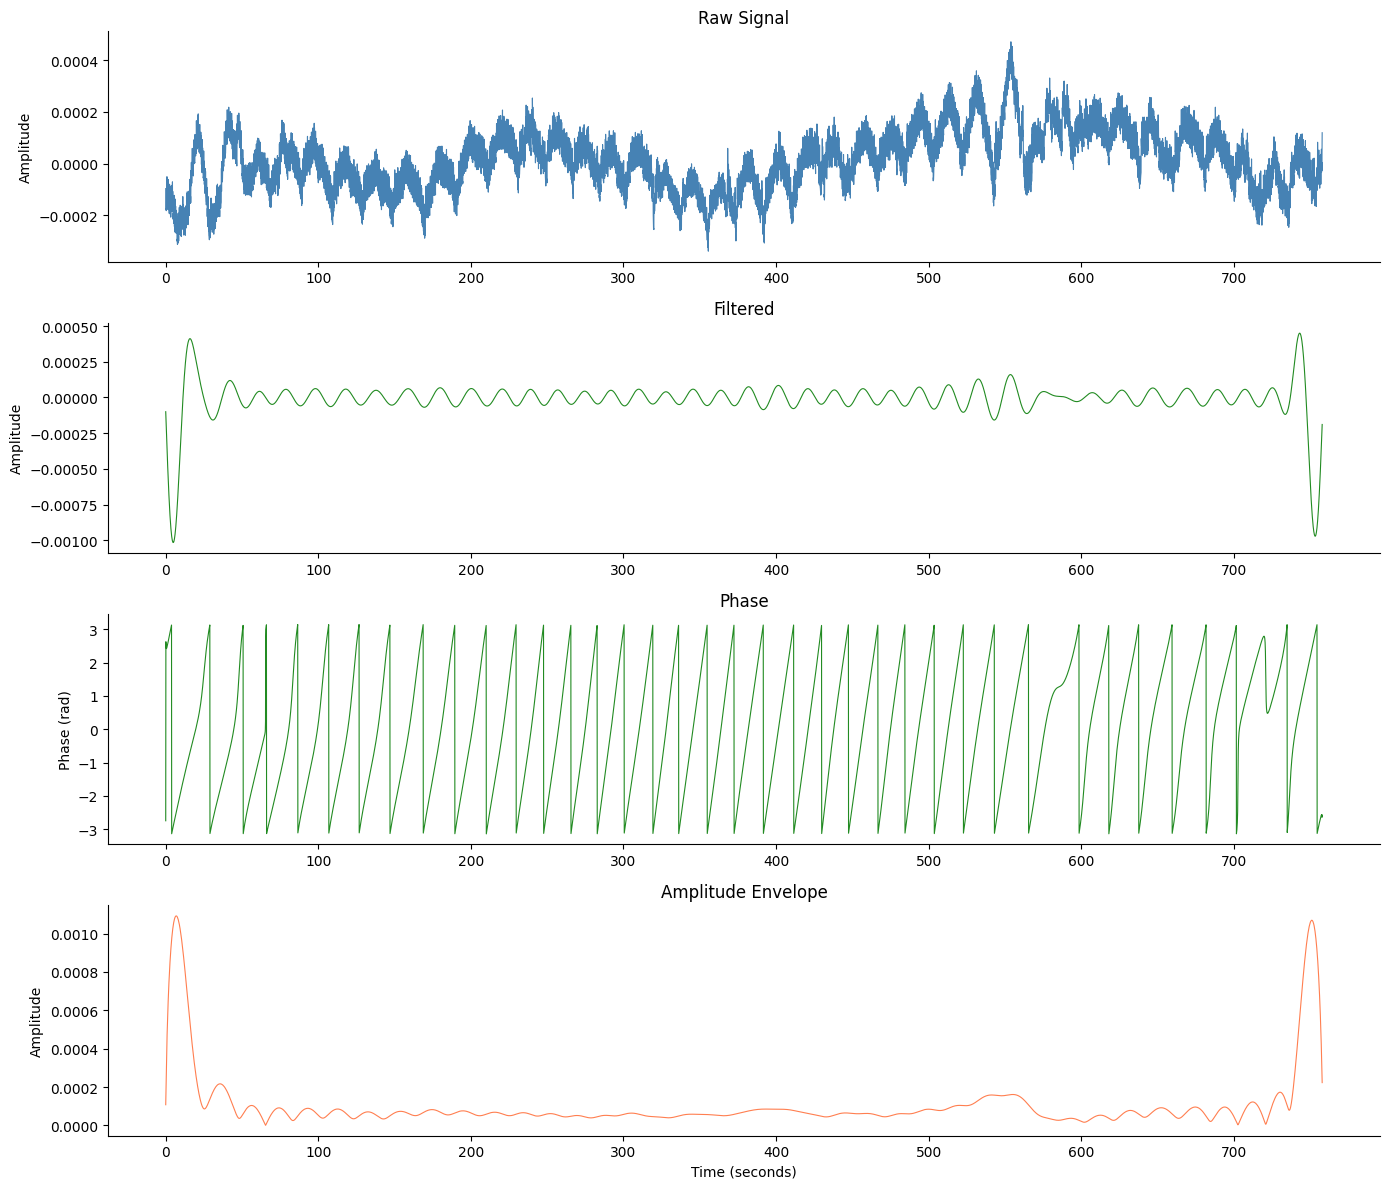

In [3]:
fig, axes = gp.plot_egg_comprehensive(signals_df, egg["sfreq"])
plt.show()

## With Artifact Overlay

Pass `artifact_info` to shade artifact cycles in red on the phase panel.

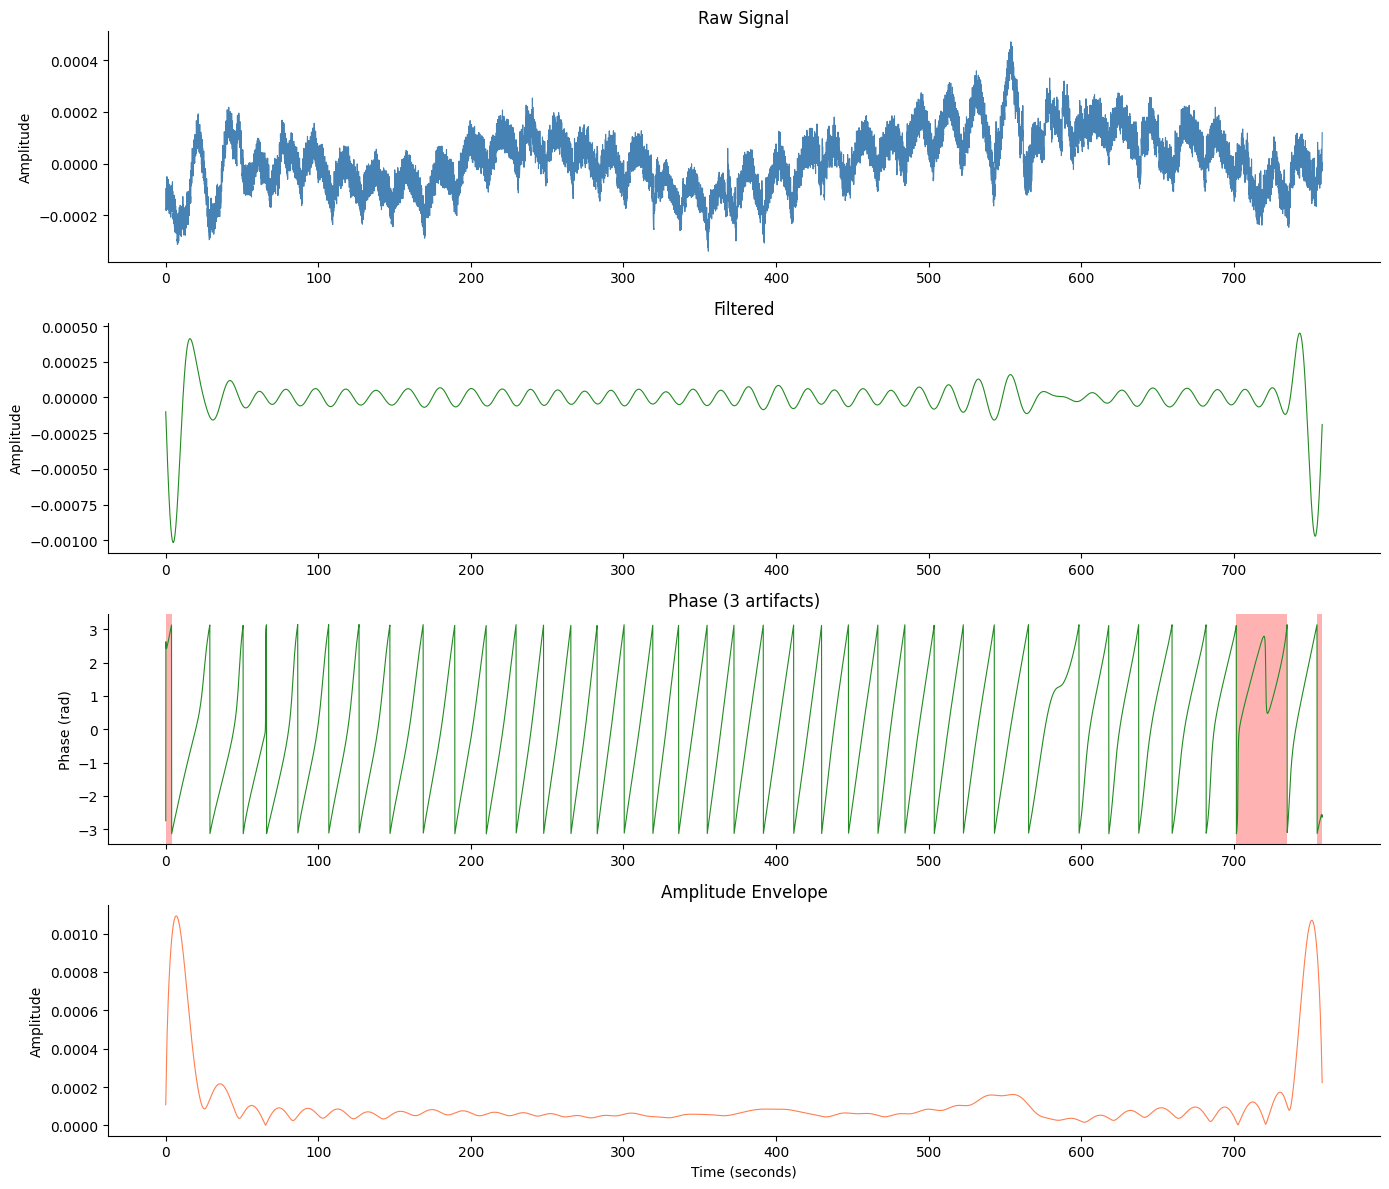

In [4]:
fig, axes = gp.plot_egg_comprehensive(
    signals_df,
    egg["sfreq"],
    artifact_info=artifact_info,
)
plt.show()

## With fMRI Volume Phase

Pass `phase_per_vol` and `tr` to add a 5th panel showing
per-volume mean phase from concurrent fMRI-EGG data.

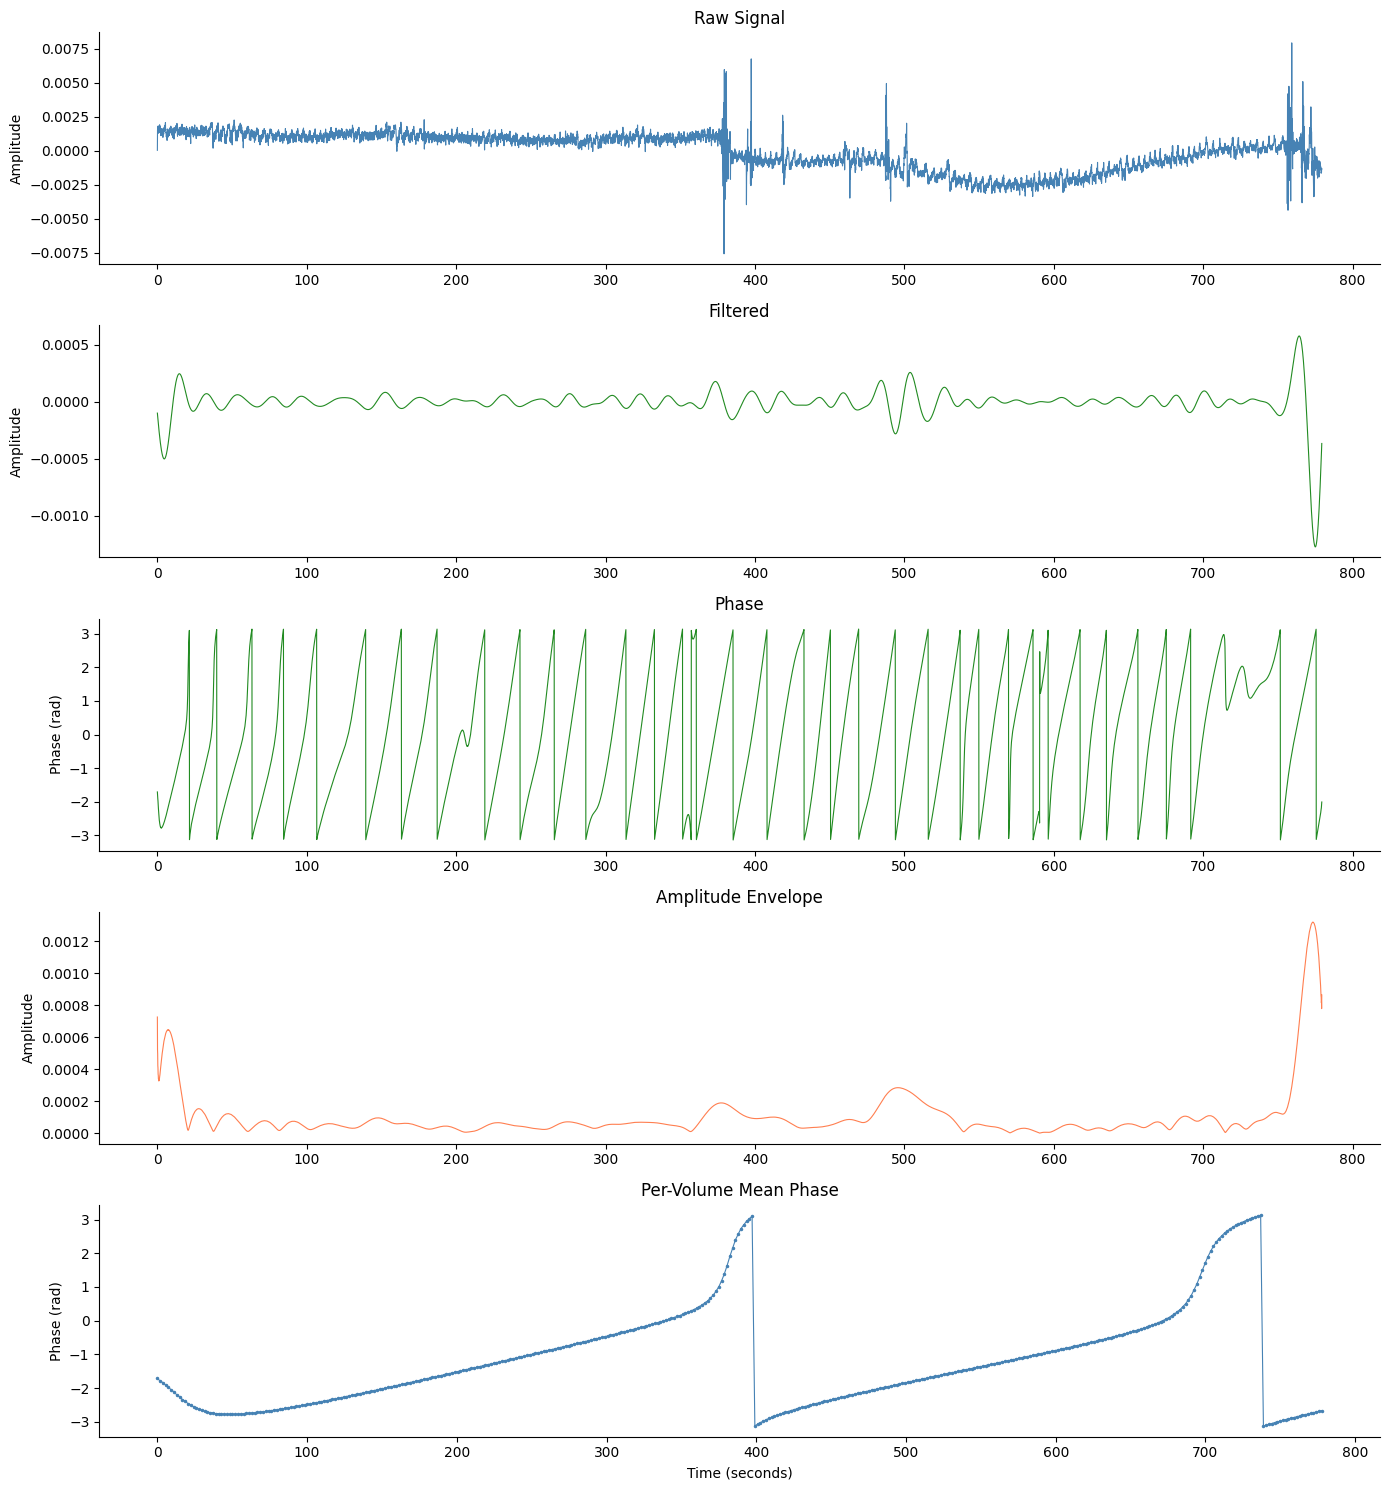

In [5]:
from gastropy.neuro.fmri import create_volume_windows, phase_per_volume

# Load fMRI-EGG data and extract volume phase
fmri = gp.load_fmri_egg(session="0001")
best_fmri, _, _, _ = gp.select_best_channel(fmri["signal"], fmri["sfreq"])
fmri_signals, fmri_info = gp.egg_process(fmri["signal"][best_fmri], fmri["sfreq"])

filt, _ = gp.apply_bandpass(
    fmri["signal"][best_fmri], fmri["sfreq"], low_hz=gp.NORMOGASTRIA.f_lo, high_hz=gp.NORMOGASTRIA.f_hi
)
_, analytic = gp.instantaneous_phase(filt)
windows = create_volume_windows(fmri["trigger_times"], fmri["tr"], len(fmri["trigger_times"]))
vol_phase = phase_per_volume(analytic, windows)

fig, axes = gp.plot_egg_comprehensive(
    fmri_signals,
    fmri["sfreq"],
    phase_per_vol=vol_phase,
    tr=fmri["tr"],
)
plt.show()

**See also:** [EGG Overview](plot_egg_overview.ipynb),
[Artifact Visualization](plot_artifacts.ipynb),
[Per-Volume Phase](plot_volume_phase.ipynb)